### Research Questions
<p><b>What is the exact demographic most at risk for covid19 in Toronto?</b></p> 
To find this we'll need to produce graphs of Age, Gender, and if they were hospitalized. 


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions as sc
path = "C:\\Users\\matta\\Documents\\UBCO 20-21\\Data 301\\course-project-group_6022\\data\\raw\\COVID19 cases Toronto.csv" 
#this formats everything quickly. 
df = sc.ez_format(path)
df

,Age_Group,Source_of_Infection,Episode_Date,Reported_Date,Gender,Outcome,Ever_Hospitalized,Ever_in_ICU,Days_Since
0,50-59,Travel,2020-01-21,2020-01-23,MALE,Yes,No,No,0
1,50-59,Travel,2020-01-22,2020-01-23,FEMALE,No,No,No,0
2,20-29,Travel,2020-02-05,2020-02-21,FEMALE,No,No,No,29
3,50-59,N/A - Outbreak associated,2020-02-07,2020-04-13,MALE,No,No,No,81
4,70-79,Travel,2020-02-14,2020-03-01,FEMALE,No,No,No,38
...,...,...,...,...,...,...,...,...,...
13212,60-69,Close contact,2020-07-12,2020-06-28,FEMALE,No,No,No,157
13213,<19,Close contact,2020-07-12,2020-07-12,FEMALE,No,No,No,171
13214,30-39,Close contact,2020-07-12,2020-07-12,MALE,No,No,No,171
13215,30-39,Travel,2020-07-12,2020-07-12,MALE,No,No,No,171


In [63]:
#create a new data frame of values we care about
ndf = df.groupby(["Gender", "Age_Group", "Ever_Hospitalized"]).size().reset_index()
ndf = ndf.rename(columns  = {0:'D_Count'})
ndf = ndf.sort_values(by = 'D_Count', ascending = False)
#drop those who were not hosplitalized, and then drop the hopitalized column. 
ndf = ndf.loc[ndf["Ever_Hospitalized"].str.contains("Yes")]
ndf = ndf.drop(["Ever_Hospitalized"], axis = 1)

#create a demographic column, combine gender and agegroup together
ndf.insert( 2,column = 'Demographic', value = (ndf['Gender'][:] + " " + ndf['Age_Group'][:]))
order = ndf['Demographic'].to_list()
ndf = ndf.reset_index(drop = True)
ndf



,Gender,Age_Group,Demographic,D_Count
0,MALE,60-69,MALE 60-69,67
1,MALE,70-79,MALE 70-79,57
2,MALE,50-59,MALE 50-59,53
3,FEMALE,60-69,FEMALE 60-69,34
4,FEMALE,50-59,FEMALE 50-59,31
5,FEMALE,70-79,FEMALE 70-79,26
6,MALE,40-49,MALE 40-49,25
7,FEMALE,80-89,FEMALE 80-89,24
8,MALE,80-89,MALE 80-89,14
9,FEMALE,40-49,FEMALE 40-49,10


Text(0.5, 0, 'Amount of Cases resulting in Hospitalization')

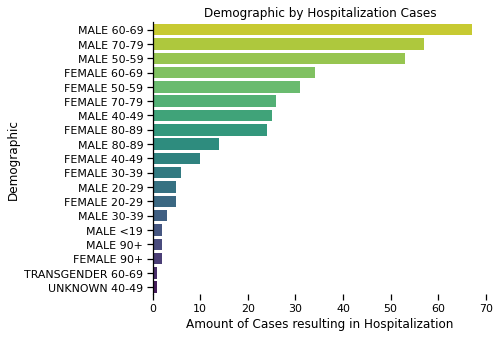

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(6,5))
sns.set_context("notebook")
sns.barplot(x ='D_Count', y = 'Demographic', data= ndf, order= order, palette = 'viridis_r')
sns.despine(top = True, right = True, left = False, bottom = True)
plt.title("Demographic by Hospitalization Cases")
plt.xlabel("Amount of Cases resulting in Hospitalization")

### Result
By our graph we can see that senior males are most succeptable to the virus. This is intriuging becase our data set actually has 
more females than males. My initial hypothesis was that the most succeptable demographic would be female, since there was over 1000 more female cases.
Here's the image of that graph that from EDA_MattKuelker.ipynb.(If you still can't find it, it's in output.png by this 

![plot showing females as largest demographic](output.png "image")

Not only that, but it apears that across the board elderly men are most at risk for the virus, desipte being a less prominent group in the data set. 
As for those least affected, 90+ is to be expected, since most people don't live that long. I am surpised that there was a trangender case that was hospitalized, considering that there are not that many trans people compared to cis gendered people. 

In hindsight I could have dropped unkown from the dataset, but during my analysis I figured I'd leave it in incase there was a majority of unknowns. 

From this data set we can also guess that females <19 are the least to be affected, since not only is there little hospitializations, but their male <19 counterparts are also at the bottom of the case count. 